In [2]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy as np
print('numpy:', np.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
from matplotlib import pyplot as plt
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

IPython: 8.12.0
numpy: 1.24.3
scipy: 1.10.1
matplotlib: 3.7.1
scikit-learn: 1.2.2


# About Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python package designed to give access to **well-known** machine learning algorithms within Python code, through a **clean, well-thought-out API**. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is [some work](https://github.com/ogrisel/parallel_ml_tutorial) in this area.

# Representation of Data in Scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

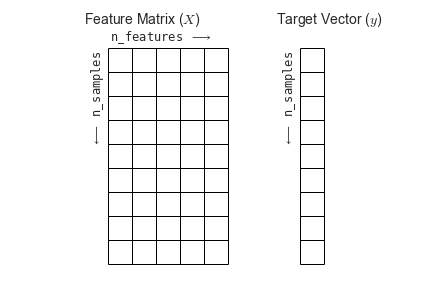

(Figure from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))

## Example: Iris Dataset

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

  ``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[5.1 3.5 1.4 0.2]


In [6]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [7]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

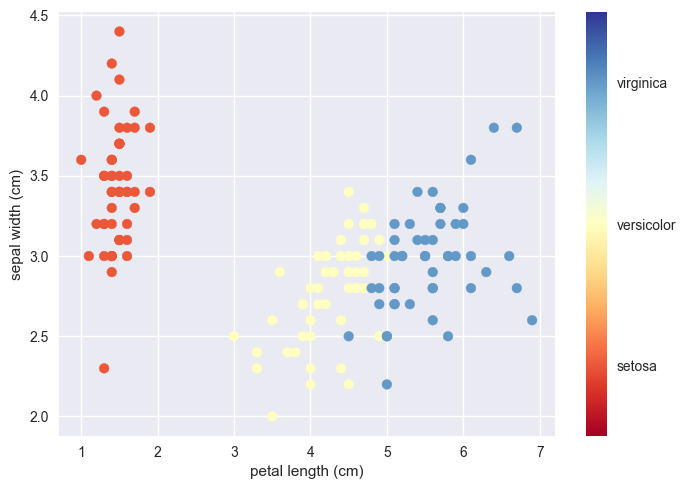

In [9]:
plt.style.use("seaborn-v0_8")
x_index = 2
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap='RdYlBu')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

# The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [10]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [11]:
model = LinearRegression()
print(model)

LinearRegression()


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [12]:
x = np.arange(10)
y = 2 * x + 1

In [13]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


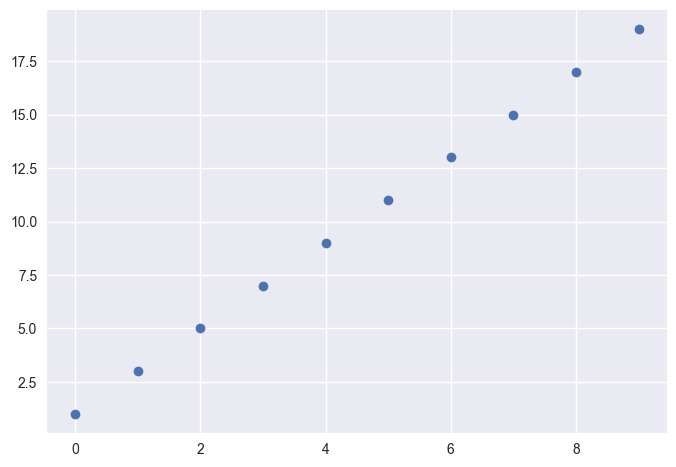

In [14]:
plt.plot(x, y, 'o');

In [15]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [16]:
# fit the model on our data
model.fit(X, y)

LinearRegression()

In [17]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[2.]
0.9999999999999982


The model found a line with a slope 2 and intercept 1, as we'd expect.

## Introduction to PipeLine
A pipeline in scikit-learn is a way to chain multiple steps of a machine learning workflow into a single object. It allows you to organize your code and simplify the process of building, validating, and deploying machine learning models. The Pipeline class in scikit-learn is used to create a pipeline object, which sequentially applies a list of transformations and a final estimator.

The main advantages of using pipelines are:
<ol>
<li>Convenience and encapsulation: You only have to call fit and predict once on your data to fit a whole sequence of estimators.</li>
<li>Joint parameter selection: You can use a single call to GridSearchCV or other hyperparameter tuning techniques to find the optimal parameters for all the estimators in the pipeline.</li>
<li>Safety: Pipelines help avoid leaking statistics from your test data into the trained model during cross-validation, by ensuring that the same samples are used to train the transformers and predictors.</li>
</ol>

that the same samples are used to train the transformers and predictors.
see last example with pipeline:

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
model = make_pipeline(StandardScaler(), LinearRegression())
x = np.arange(10)
y = 2 * x + 1
X = x[:, np.newaxis]

In [19]:
model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [20]:
linear_regression_step = model.named_steps['linearregression']
# Get the coefficients and intercept
coefficients = linear_regression_step.coef_
intercept = linear_regression_step.intercept_

In [21]:
# underscore at the end indicates a fit parameter
print(coefficients)
print(intercept)

[5.74456265]
10.0


Why do you think the resaults are different?( is this related to scaler?)